**Задачи**

Импортируйте библиотеку pandas. Загрузите два датасета user_data и logs. 

Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиумные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
Описание данных
user_data:

client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст
logs:

client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix

In [4]:
#Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
#Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

import pandas as pd

In [5]:
user_data=pd.read_csv('C:/Users/User/Downloads/3_user_data.csv')
logs=pd.read_csv('C:/Users/User/Downloads/3_logs.csv')

In [6]:
user_data.head(2)

,client,premium,age
0,46346,False,58
1,4391,False,55


In [7]:
user_data.shape

(2954, 3)

In [8]:
logs.head(2)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658


In [9]:
logs.shape

(4500, 4)

In [10]:
#Сколько уникальных значений принимает переменная platform?
logs.platform.nunique()

3

In [11]:
#Какой клиент совершил больше всего успешных операций?

#Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую
#и пробел в порядке возрастания. Например:12, 123, 456


In [12]:
logs.query('success == True').value_counts('client').max()

41

In [13]:
number_success=logs.query('success == True').groupby(['client'], as_index=False).agg({'success':'count'}).sort_values('success', ascending=False)

In [31]:
max_success = number_success.query('success == 41')
max_success

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [32]:
max_success['client'].sort_values().tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [33]:
#С какой платформы осуществляется наибольшее количество успешных операций?
success_platform = logs.loc[logs.success == True].platform.value_counts()
success_platform

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [34]:
merged_data= user_data.merge(logs, on='client', how='inner')
merged_data.head(2)

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861


In [35]:
#Какая платформа наиболее популярна среди премиумных клиентов?
premium_clients_platform= merged_data.query('premium == True').groupby(['platform']).agg({'premium':'count'})
premium_clients_platform

,premium
platform,
computer,150
phone,246
tablet,24


In [36]:
premium= merged_data.query('premium == True')
non_premium=merged_data.query('premium == False')

In [37]:
#Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
#используя библиотеку seaborn с параметрами цвета по умолчанию. 
#Какой график получится в результате?
import seaborn as sns

D:\JUPITER\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\JUPITER\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

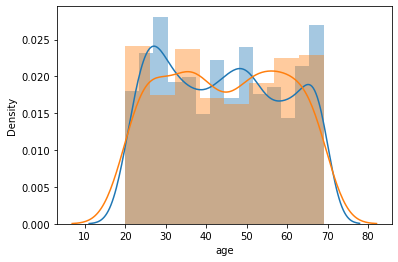

In [38]:
sns.distplot(non_premium.age)
sns.distplot(premium.age)


D:\JUPITER\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='success', ylabel='count'>

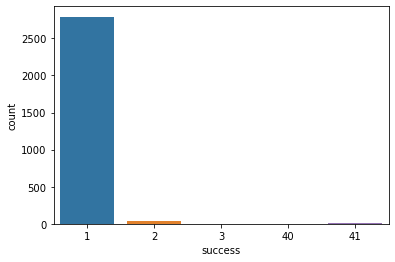

In [39]:
#Постройте график распределения числа успешных операций: 

#x – число успешных операций
#y – число клиентов, совершивших столько успешных операций
sns.countplot(number_success.success)
#sns.countplot(success_clients.client)

D:\JUPITER\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

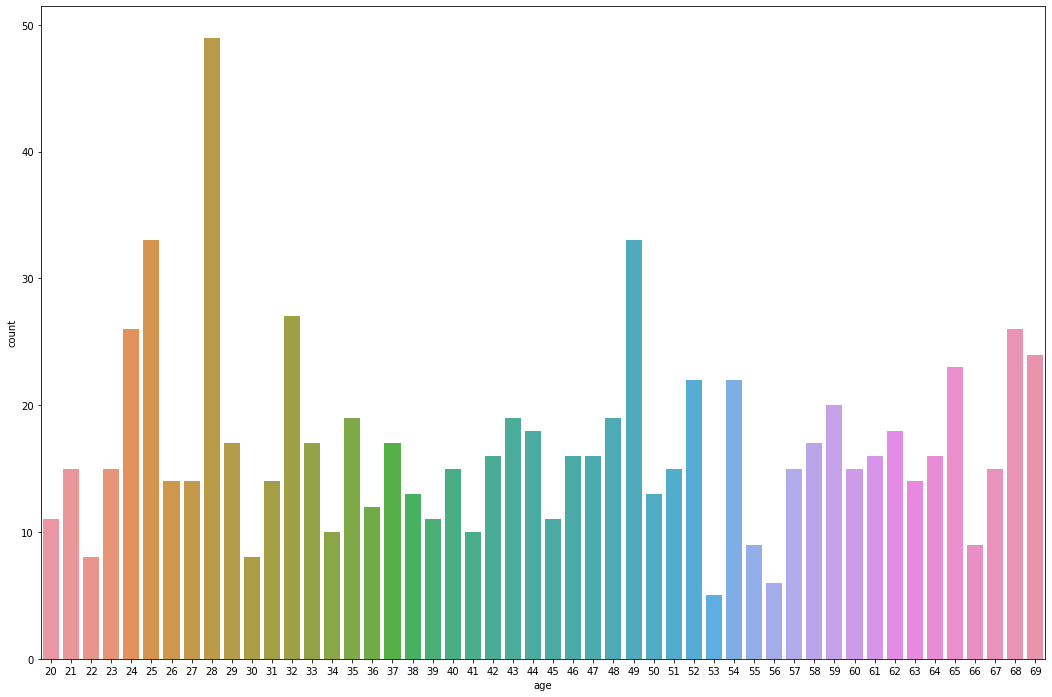

In [55]:
#Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

#Визуализируйте число успешных операций, сделанных на платформе computer, 
#в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 
#Если размер графика получается небольшим, 
#можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 
age_range=merged_data.query('success == True').query('platform == "computer"')
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
#figure(figsize=(8, 6), dpi=80)
plt.figure(figsize=(18, 12))
sns.countplot(age_range.age)
#Видим по графику, что клиенты в возрасте 28 лет совершили больше всего успешных действий на платформе computer